**Importing Libraries**

In [81]:
import os
from google.cloud import bigquery
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Setting Up Google BigQuery Authentication and Client**\

In [82]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'C:/Users/Edgar/Documents/Python/BigQuery Keys/Edgar1/majestic-casing-291711-7d549db53ec7.json'

client = bigquery.Client()

**Getting Query as Dataframe**

Taking a random sample of 2000 accidents reported to the NYPD.

Only taking cases that have a specified contributing factor, timestamp, and borough.

In [83]:
sql_query = """
SELECT * FROM nypd_motor_vehicle_collisions.nypd_mv_collisions
WHERE 
    contributing_factor_vehicle_1 != 'Unspecified'
    AND contributing_factor_vehicle_1 IS NOT NULL
    AND timestamp IS NOT NULL
    AND borough IS NOT NULL
ORDER BY RAND()
LIMIT 2000
"""
# the above query gets 2000 random rows from the NYPD collision data


query_job = client.query(sql_query)

df = query_job.to_dataframe()

**Examining and Cleaning Data**

In [84]:
print('First 5 Rows')
display(df.head())

print('ALL COLUMNS')
display(df.columns)

print('# Rows and Columns')
print(df.shape) # 2000 rows, 28 columns

print('Summary of Numerical Variables')
display(df.describe())

for col in df:
    print(df[col].unique())

First 5 Rows


,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
0,MANHATTAN,Traffic Control Disregarded,Unspecified,None,None,None,WEST 47 STREET,2013-12-05 08:15:00,40.760405,-73.987474,...,0,None,8 AVENUE,43796,LARGE COM VEH(6 OR MORE TIRES),TAXI,None,None,None,10036
1,QUEENS,Driver Inattention/Distraction,Unspecified,None,None,None,VAN LOON STREET,2013-12-03 11:30:00,40.737158,-73.879405,...,0,None,QUEENS BOULEVARD,258674,SPORT UTILITY / STATION WAGON,BICYCLE,None,None,None,11373
2,QUEENS,Driver Inattention/Distraction,Unspecified,None,None,None,None,2021-12-11 16:00:00,40.739895,-73.893910,...,0,70-20 QUEENS BOULEVARD,None,4485453,Sedan,None,None,None,None,11377
3,QUEENS,Backing Unsafely,Unspecified,None,None,None,MAPLE AVENUE,2019-09-02 10:30:00,40.755390,-73.828285,...,0,None,MAIN STREET,4198625,Station Wagon/Sport Utility Vehicle,Sedan,None,None,None,11355
4,BRONX,Turning Improperly,Unspecified,None,None,None,WEST TREMONT AVENUE,2012-08-03 07:10:00,40.850478,-73.915425,...,0,None,UNIVERSITY AVENUE,92256,PASSENGER VEHICLE,PASSENGER VEHICLE,None,None,None,10453


ALL COLUMNS


Index(['borough', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'cross_street_name', 'timestamp', 'latitude', 'longitude', 'location',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_persons_injured', 'number_of_persons_killed',
       'off_street_name', 'on_street_name', 'unique_key', 'vehicle_type_code1',
       'vehicle_type_code2', 'vehicle_type_code_3', 'vehicle_type_code_4',
       'vehicle_type_code_5', 'zip_code'],
      dtype='object')

# Rows and Columns
(2000, 28)
Summary of Numerical Variables


,latitude,longitude,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,unique_key,zip_code
count,1946.000000,1946.000000,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,1999.000000
mean,40.558178,-73.617094,0.025500,0.0,0.207500,0.000500,0.054500,0.000500,0.290000,0.001000,3.176441e+06,10823.428214
std,2.607671,4.731793,0.160819,0.0,0.638473,0.022361,0.239914,0.022361,0.683472,0.031615,1.441583e+06,562.128149
min,0.000000,-74.239266,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.380000e+02,10001.000000
25%,40.671710,-73.976844,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.226992e+06,10304.000000
50%,40.722008,-73.928829,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.691711e+06,11205.000000
75%,40.769388,-73.865886,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.119642e+06,11249.000000
max,40.908295,0.000000,2.000000,0.0,7.000000,1.000000,3.000000,1.000000,7.000000,1.000000,4.548765e+06,11694.000000


['MANHATTAN' 'QUEENS' 'BRONX' 'BROOKLYN' 'STATEN ISLAND']
['Traffic Control Disregarded' 'Driver Inattention/Distraction'
 'Backing Unsafely' 'Turning Improperly' 'Other Vehicular'
 'Lost Consciousness' 'Fatigued/Drowsy' 'Failure to Yield Right-of-Way'
 'Following Too Closely' 'Passing or Lane Usage Improper'
 'Passing Too Closely' 'Unsafe Lane Changing' 'Outside Car Distraction'
 'Alcohol Involvement' 'Pavement Slippery' 'Driver Inexperience'
 'Prescription Medication' 'Illness' 'Physical Disability'
 'Oversized Vehicle'
 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion'
 'View Obstructed/Limited' 'Passenger Distraction'
 'Driverless/Runaway Vehicle' 'Obstruction/Debris' 'Brakes Defective'
 'Aggressive Driving/Road Rage' 'Glare' 'Reaction to Uninvolved Vehicle'
 'Drugs (Illegal)' 'Unsafe Speed' 'Animals Action' 'Drugs (illegal)'
 'Other Electronic Device' 'Traffic Control Device Improper/Non-Working'
 'Lane Marking Improper/Inadequate' 'Steering Failure' 'Illnes'
 'Failure to Ke

The following columns have redudant values that can be grouped together:
- contributing_factor_vehicle_1 (has 'Illness' and 'Illnes')
- vehicle_type_code1/code2/code3/code4/code5 (have same values but with varying capital cases or spelling)
   
Fixing that below:

In [85]:
# Fixing contributing_factor_vehicle_1

print('BEFORE')
print('Rows with "Illnes"')
display(df.loc[df['contributing_factor_vehicle_1'] == 'Illnes'])
print('Rows with "Illness"')
display(df.loc[df['contributing_factor_vehicle_1'] == 'Illness'])

# Changing 'Illnes' values to 'Illness'
df.loc[df['contributing_factor_vehicle_1'] == 'Illnes', 'contributing_factor_vehicle_1'] = 'Illness'

print('AFTER')
print('Rows with "Illnes"')
display(df.loc[df['contributing_factor_vehicle_1'] == 'Illnes'])
print('Rows with "Illness"')
display(df.loc[df['contributing_factor_vehicle_1'] == 'Illness'])

BEFORE
Rows with "Illnes"


,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
388,BROOKLYN,Illnes,Driver Inattention/Distraction,None,None,None,BOYLAND STREET,2018-07-24 08:15:00,40.676495,-73.913704,...,0,None,ATLANTIC AVENUE,3947614,Station Wagon/Sport Utility Vehicle,Sedan,None,None,None,11233


Rows with "Illness"


,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
31,QUEENS,Illness,Fatigued/Drowsy,None,None,None,64 PLACE,2013-01-29 16:10:00,40.701428,-73.891653,...,0,None,CYPRESS HILLS STREET,215261,PASSENGER VEHICLE,PASSENGER VEHICLE,None,None,None,11385
182,MANHATTAN,Illness,Driver Inexperience,None,None,None,EAST 4 STREET,2015-10-08 18:40:00,40.726186,-73.989429,...,0,None,2 AVENUE,3311618,TAXI,BICYCLE,None,None,None,10003
1167,MANHATTAN,Illness,None,None,None,None,IRVING PLACE,2014-07-18 00:13:00,40.736465,-73.986963,...,0,None,EAST 18 STREET,994817,PICK-UP TRUCK,LIVERY VEHICLE,None,None,None,10003
1267,QUEENS,Illness,Unspecified,None,None,None,BEACH CHANNEL DRIVE,2013-11-24 15:00:00,40.605334,-73.755274,...,0,None,MOTT AVENUE,203416,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,None,None,None,11691
1503,QUEENS,Illness,Unspecified,Unspecified,None,None,34 AVENUE,2013-09-10 00:19:00,40.760455,-73.843056,...,0,None,127 STREET,258035,BUS,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES),None,None,11368


AFTER
Rows with "Illnes"


,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code


Rows with "Illness"


,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
31,QUEENS,Illness,Fatigued/Drowsy,None,None,None,64 PLACE,2013-01-29 16:10:00,40.701428,-73.891653,...,0,None,CYPRESS HILLS STREET,215261,PASSENGER VEHICLE,PASSENGER VEHICLE,None,None,None,11385
182,MANHATTAN,Illness,Driver Inexperience,None,None,None,EAST 4 STREET,2015-10-08 18:40:00,40.726186,-73.989429,...,0,None,2 AVENUE,3311618,TAXI,BICYCLE,None,None,None,10003
388,BROOKLYN,Illness,Driver Inattention/Distraction,None,None,None,BOYLAND STREET,2018-07-24 08:15:00,40.676495,-73.913704,...,0,None,ATLANTIC AVENUE,3947614,Station Wagon/Sport Utility Vehicle,Sedan,None,None,None,11233
1167,MANHATTAN,Illness,None,None,None,None,IRVING PLACE,2014-07-18 00:13:00,40.736465,-73.986963,...,0,None,EAST 18 STREET,994817,PICK-UP TRUCK,LIVERY VEHICLE,None,None,None,10003
1267,QUEENS,Illness,Unspecified,None,None,None,BEACH CHANNEL DRIVE,2013-11-24 15:00:00,40.605334,-73.755274,...,0,None,MOTT AVENUE,203416,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,None,None,None,11691
1503,QUEENS,Illness,Unspecified,Unspecified,None,None,34 AVENUE,2013-09-10 00:19:00,40.760455,-73.843056,...,0,None,127 STREET,258035,BUS,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES),None,None,11368


In [87]:
# Fixing vehicle_type_code

vehicle_columns = ('vehicle_type_code1',
                   'vehicle_type_code2',
                   'vehicle_type_code_3',
                   'vehicle_type_code_4',
                   'vehicle_type_code_5')

vehicle_values = {'SEDAN' : 'Sedan',
                  'SPORT UTILITY / STATION WAGON' : 'Station Wagon/Sport Utility Vehicle',
                  'BUS' : 'Bus',
                  'Tractor Truck Diesel' : 'Tractor Truck',
                  'Tractor Truck Gasoline' : 'Tractor Truck',
                  'TAXI' : 'Taxi',
                  'AMBULANCE' : 'Ambulance',
                  'AMBUL' : 'Ambulance',
                  'PICK-UP TRUCK' : 'Pick-up Truck',
                  'VAN' : 'Van',
                  '4 dr sedan' : 'Sedan',
                  '2 dr sedan' : 'Sedan',
                  'E-Bik' : 'E-Bike',
                  'Dump' : 'Garbage',
                  'DUMP' : 'Garbage',
                  'Garbage or Refuse' : 'Garbage',
                  'MOTORCYCLE' : 'Motorcycle',
                  'DELIV' : 'Delivery',
                  'LIVERY VEHICLE' : 'Delivery',
                  'usps' : 'Delivery',
                  'Refrigerated Van' : 'Van',
                  'OTHER' : 'UNKNOWN',
                  'Fire' : 'Fire Truck',
                  'FDNY' : 'Fire Truck',
                  'FIRE TRUCK' : 'Fire Truck',
                  'SCOOT' : 'E-Scooter',
                  'E-Sco' : 'E-Scooter',
                  'Box t' : 'Box Truck',
                 }


# all original values 
print('BEFORE')
print('Vehicle Values"')
display(df['vehicle_type_code1'].unique())

# for each vehicle type column, change the original values to corrected ones
for col in vehicle_columns:
    for orig, new in vehicle_values.items():
        df.loc[df[col] == orig, col] = new

# all new values
print('AFTER')
print('Vehicle Values')
display(df['vehicle_type_code1'].unique())

BEFORE
Vehicle Values"


array(['LARGE COM VEH(6 OR MORE TIRES)', 'SPORT UTILITY / STATION WAGON',
       'Sedan', 'Station Wagon/Sport Utility Vehicle',
       'PASSENGER VEHICLE', 'UNKNOWN', 'VAN', '2 dr sedan', 'Bus', 'Taxi',
       'BUS', 'TAXI', 'Pick-up Truck', 'Box Truck', 'OTHER', 'Moped',
       'Armored Truck', 'LIVERY VEHICLE', 'Ambulance', '4 dr sedan',
       'Van', 'SMALL COM VEH(4 TIRES) ', 'Tow Truck', 'PICK-UP TRUCK',
       None, 'DUMP', 'Flat Bed', 'MOTORCYCLE', 'E-Scooter', '3-Door',
       'Pedicab', 'Chassis Cab', 'AMBULANCE', 'Carry All', 'PK', 'Bike',
       'Motorcycle', 'Garbage or Refuse', 'Lunch Wagon', 'UNK',
       'Tractor Truck Diesel', 'E-Bike', 'Tractor Truck Gasoline',
       'Tow Truck / Wrecker', 'E-Sco', 'TRL', 'Dump', 'AMBUL', 'APPOR',
       'Convertible', 'FIRE TRUCK', 'Flat Rack', 'Concrete Mixer',
       'Motorbike'], dtype=object)

AFTER
Vehicle Values


array(['LARGE COM VEH(6 OR MORE TIRES)',
       'Station Wagon/Sport Utility Vehicle', 'Sedan',
       'PASSENGER VEHICLE', 'UNKNOWN', 'Van', 'Bus', 'Taxi',
       'Pick-up Truck', 'Box Truck', 'Moped', 'Armored Truck', 'Delivery',
       'Ambulance', 'SMALL COM VEH(4 TIRES) ', 'Tow Truck', None,
       'Garbage', 'Flat Bed', 'Motorcycle', 'E-Scooter', '3-Door',
       'Pedicab', 'Chassis Cab', 'Carry All', 'PK', 'Bike', 'Lunch Wagon',
       'UNK', 'Tractor Truck', 'E-Bike', 'Tow Truck / Wrecker', 'TRL',
       'APPOR', 'Convertible', 'Fire Truck', 'Flat Rack',
       'Concrete Mixer', 'Motorbike'], dtype=object)

Data appears to be clean

Proceeding to analyses.

# ** Analysis**

## **Questions to answer:**
- Most common contributing factor?
- During what time of the year are there the most accidents?
- What boroughs have the most accidents?
- What factors are most fatal?
- What car type is most fatal?
- Has accident frequency changed over time?

## **What is the most common contributing factor?**

I will be focusing on only the column "contributing_factor_vehicle_1" as that is the most complete, and appears to be the main factor in each accident.

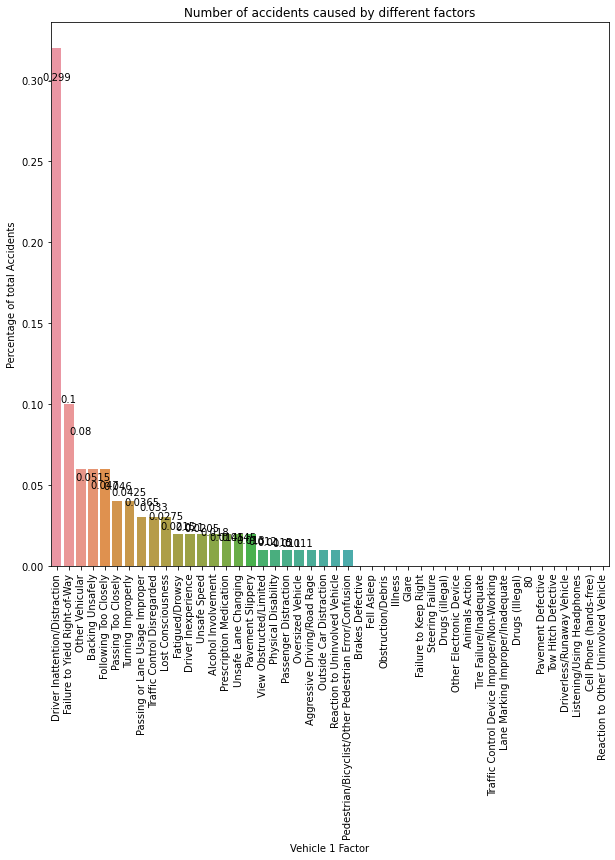

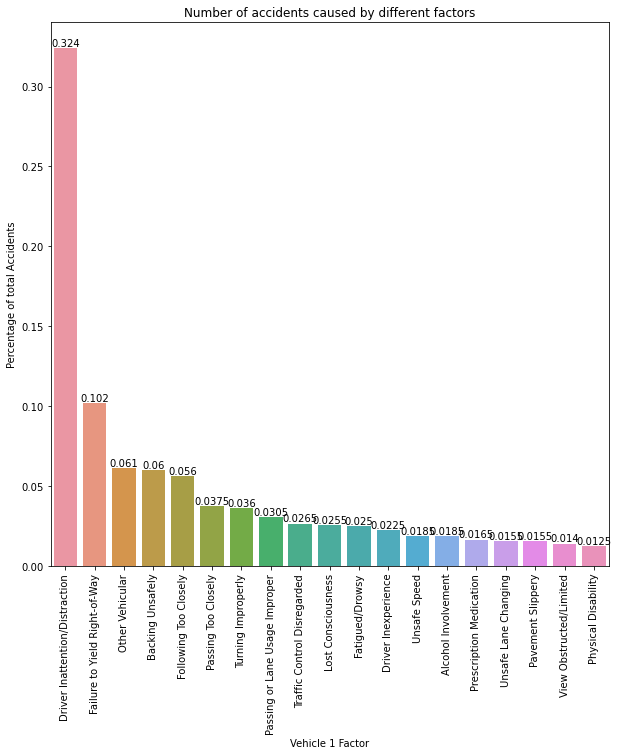

In [88]:
# Get total count of number of accidents caused by each contributing factor
# vehicle_1_data = df.groupby('contributing_factor_vehicle_1')['contributing_factor_vehicle_1'].agg(count = 'count')
vehicle_1_data = df['contributing_factor_vehicle_1'].value_counts()
vehicle_1_data_norm = df['contributing_factor_vehicle_1'].value_counts(normalize = True).round(decimals = 2)
sig_vehicle_1_data = vehicle_1_data[vehicle_1_data >= 20]
sig_vehicle_1_data_norm = vehicle_1_data[vehicle_1_data >= 20]/sum(vehicle_1_data)

# Finding which accident factor is most common
fig, ax = plt.subplots(figsize = (10,10))
sns.barplot(x = vehicle_1_data_norm.index, y = vehicle_1_data_norm)
ax.bar_label(bar.containers[0])
ax.set_xticklabels(labels = vehicle_1_data_norm.index, rotation = 90)
ax.set(xlabel = 'Vehicle 1 Factor', 
       ylabel = 'Percentage of total Accidents', 
       title = 'Number of accidents caused by different factors')
plt.show()

fig, ax = plt.subplots(figsize = (10,10))
bar = sns.barplot(x = sig_vehicle_1_data_norm.index, y = sig_vehicle_1_data_norm)
ax.bar_label(bar.containers[0])
ax.set_xticklabels(labels = sig_vehicle_1_data_norm.index, rotation = 90)
ax.set(xlabel = 'Vehicle 1 Factor', 
       ylabel = 'Percentage of total Accidents', 
       title = 'Number of accidents caused by different factors')
plt.show()

Driver Inattention appears to be the most common cause.

Since this is a random sample, it is possible that the difference is due to chance.

I will use a Chi-Square test to determine if there are any statistically significant differences in number of accidents between groups:

In [89]:
from scipy.stats import chisquare

print('Comparing all factors')
print(chisquare(vehicle_1_data)) # comparing all factors

print('\nComparing only factors with 20 or more accidents')
print(chisquare(sig_vehicle_1_data)) # comparing only factors with 20 or more accidents

Comparing all factors
Power_divergenceResult(statistic=10344.284, pvalue=0.0)

Comparing only factors with 20 or more accidents
Power_divergenceResult(statistic=3704.209264305177, pvalue=0.0)


The results of the Chi-square test suggest that it is extremely unlikely that the difference we see in the number of accidents attributed to specific causes is due to random chance. There is a real, statistical difference between the factors.

## **During what time of the year are there more accidents?**

Looking at the distribution of accidents occurring in each month

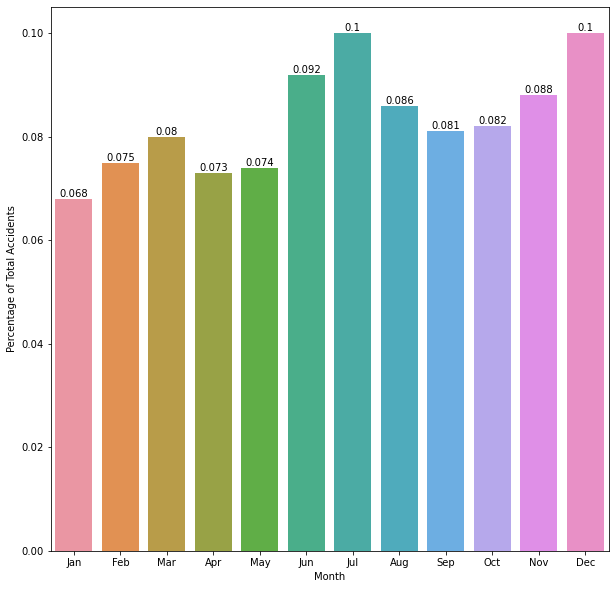

In [90]:
df['month'] = df['timestamp'].dt.month_name().str[:3]
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['month'] = pd.Categorical(df['month'], ordered = True, categories = month_order)

month_data = df['month'].value_counts(sort = False)
month_data_norm = round(df['month'].value_counts(normalize = True, sort = False), 3)

# display(month_data_norm)

# Finding which months have the most accidents
fig, ax = plt.subplots(figsize = (10,10))
sns.barplot(x = month_data_norm.index, y = month_data_norm)
ax.bar_label(ax.containers[0])
ax.set(xlabel = 'Month', ylabel = 'Percentage of Total Accidents')
plt.show()

June appears to be the month with the highest number of accidents.

This could be to chance. I will perform a Chi-Square test to determine if the difference is statistically significant.

In [91]:
chisquare(month_data)

Power_divergenceResult(statistic=29.164, pvalue=0.002140656909447749)

There does appear to be a real difference in accidents between the months, as any deviation we observe is unlikely to be due to chance.

## **Which boroughs have the most accidents?**

BROOKLYN         575
QUEENS           568
MANHATTAN        481
BRONX            290
STATEN ISLAND     86
Name: borough, dtype: int64

[Text(0.5, 0, 'New York Borough'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, 'Number of Accidents per NY Borough (n = 2000)')]

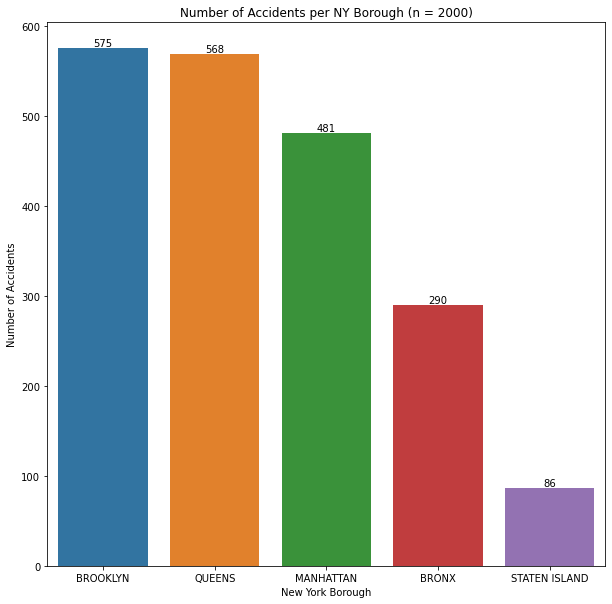

In [101]:
borough_data = df['borough'].value_counts()
borough_data_norm = round(df['borough'].value_counts(normalize = True), 2)

display(borough_data)
total_n = borough_data.sum()


fig, ax = plt.subplots(figsize = (10,10))
sns.barplot(x = borough_data.index, y = borough_data)
ax.bar_label(ax.containers[0])
ax.set(xlabel = 'New York Borough', ylabel = 'Number of Accidents', title = f'Number of Accidents per NY Borough (n = {total_n})')

It appears Brooklyn and Queens have the most accidents, while Staten Island has the least. This could be due to differences in population.

I will scrape population data from Wikipedia to use this data.

In [102]:
# libraries for web-scraping
from bs4 import BeautifulSoup
import requests

# checking ability to scrape wiki table
url = 'https://en.wikipedia.org/wiki/Boroughs_of_New_York_City'
r = requests.get(url)
print(r.status_code)

200


Response code 200 means we are able to scrape the data

In [103]:
soup = BeautifulSoup(r.text, 'html.parser')
ny_table = soup.find('table', {'class' : 'wikitable'})

ny_pop = pd.read_html(str(ny_table))
ny_pop = pd.DataFrame(ny_pop[0])
ny_pop.columns = ny_pop.columns.droplevel([0,1]) # remove top 2 columns
ny_pop.rename(columns = {'Census (2020)' : 'population_2020', 'persons/km2' : 'persons_km2'}, inplace = True) # rename population column
ny_pop.drop(columns = ['Unnamed: 8_level_2', 
                       'square miles', 'persons/mi2', 
                       'County', 
                       'billions(2012 US$)'], inplace = True) # remove empty/unnecessary columns

borough_names = {'The Bronx' : 'BRONX',
                'Brooklyn' : 'BROOKLYN',
                'Manhattan' : 'MANHATTAN',
                'Queens' : 'QUEENS',
                'Staten Island' : 'STATEN ISLAND'}

# Changing borough names to match the names from the NYPD data set for merging
for orig, new in borough_names.items():
    ny_pop.loc[ny_pop['Borough'] == orig, 'Borough'] = new

ny_pop.head()

,Borough,population_2020,squarekm,persons_km2
0,BRONX,1472654,109.3,13482
1,BROOKLYN,2736074,179.7,15227
2,MANHATTAN,1694263,58.8,28872
3,QUEENS,2405464,281.5,8542
4,STATEN ISLAND,495747,148.9,3327


Merging Population data with NYPD Accident data grouped by Borough

In [104]:
borough_df = pd.DataFrame({'Borough' : borough_data.index, 'accident_count' : borough_data})
borough_norm_df = pd.DataFrame({'Borough' : borough_data_norm.index, 'accident_percentage' : borough_data_norm})
borough_data_merged = pd.merge(left = borough_df, right = ny_pop, left_on = 'Borough', right_on = 'Borough')
borough_data_merged = pd.merge(left = borough_norm_df, right = borough_data_merged, left_on = 'Borough', right_on = 'Borough')
borough_data_merged[['population_2020','squarekm','persons_km2']] = borough_data_merged[['population_2020','squarekm','persons_km2']].apply(pd.to_numeric, errors = 'coerce') # the values were not numeric value types
display(borough_data_merged)

,Borough,accident_percentage,accident_count,population_2020,squarekm,persons_km2
0,BROOKLYN,0.29,575,2736074,179.7,15227
1,QUEENS,0.28,568,2405464,281.5,8542
2,MANHATTAN,0.24,481,1694263,58.8,28872
3,BRONX,0.14,290,1472654,109.3,13482
4,STATEN ISLAND,0.04,86,495747,148.9,3327


Adding Percentage Column for Population, and column to adjust relative accident % by relative population %. A ratio of 1 means that the accident amount is proportional to the population. Greater than 1 indicates more accidents than is accounted for by the population

,Borough,accident_percentage,accident_count,population_2020,squarekm,persons_km2,pop_percentage,accident_adj_pop
0,BROOKLYN,0.29,575,2736074,179.7,15227,0.31,0.935484
1,QUEENS,0.28,568,2405464,281.5,8542,0.27,1.037037
2,MANHATTAN,0.24,481,1694263,58.8,28872,0.19,1.263158
3,BRONX,0.14,290,1472654,109.3,13482,0.17,0.823529
4,STATEN ISLAND,0.04,86,495747,148.9,3327,0.06,0.666667


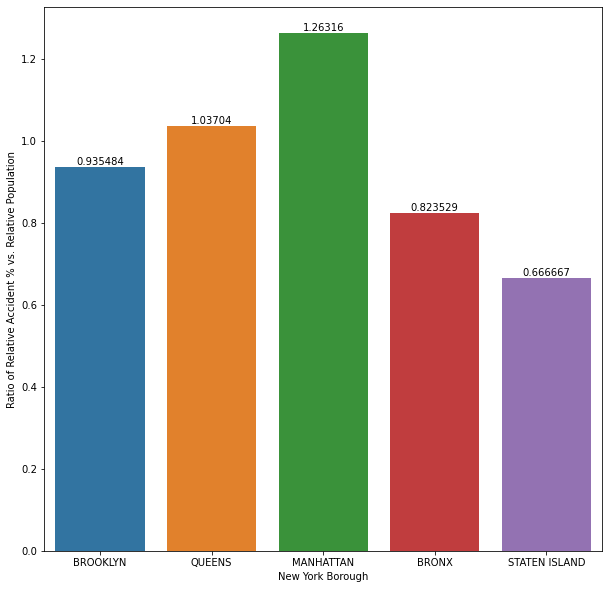

In [105]:
borough_data_merged['pop_percentage'] = round(borough_data_merged['population_2020']/borough_data_merged['population_2020'].sum(), 2)
borough_data_merged['accident_adj_pop'] = borough_data_merged['accident_percentage']/(borough_data_merged['pop_percentage'])
display(borough_data_merged)

plt.figure(figsize = (10,10))
bar = sns.barplot(x = 'Borough', y = 'accident_adj_pop', data = borough_data_merged)
bar.bar_label(bar.containers[0])
plt.xlabel('New York Borough')
plt.ylabel('Ratio of Relative Accident % vs. Relative Population')
plt.show()

It seems that Manhattan has a higher ratio of accidents:population compared to other boroughs.

How does it's population density compare to other boroughs?

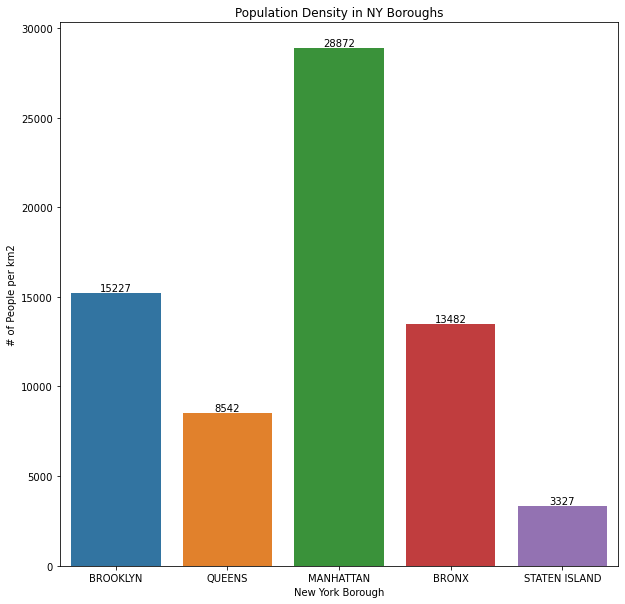

In [107]:
fig, ax = plt.subplots(figsize = (10,10))
sns.barplot(x = 'Borough', y = 'persons_km2', data = borough_data_merged)
ax.bar_label(ax.containers[0])
ax.set(xlabel = 'New York Borough', ylabel = '# of People per km2', title = 'Population Density in NY Boroughs')
plt.show()

Manhattan has the highest population density. This could explain its extreme amount of accidents.

Knowing that the number of car accidents appears to be affected by total population and population density, we can run a multivariate linear regression to examine the relationship between these variables.

In [109]:
import statsmodels.api as sm

formula = 'accident_count ~ population_2020 + persons_km2'
model = sm.formula.ols(formula = formula, data = borough_data_merged)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         accident_count   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     22.63
Date:                Fri, 02 Sep 2022   Prob (F-statistic):             0.0423
Time:                        14:26:50   Log-Likelihood:                -25.362
No. Observations:                   5   AIC:                             56.72
Df Residuals:                       2   BIC:                             55.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -41.6225     72.352     

C:\Users\Edgar\miniconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


This multivariate regression model has a high adjusted R2 value of 0.92 (indicating 92% of the variation in # of accidents is explained by population and population density). The model itself is significant (p = 0.042), indicating the fit of the model is good enough to interpret.

Looking at the each factor in the model, borough population (population_2020) has a p-value of 0.028, indicating it has a statistically significant relationship with the number of accidents. This factor also has an effect estimate of 0.0002, meaning for each unit increase in borough population leads to an average increase of 0.002 accidents. However, population density does not have a statistically significant relationship (p = 0.30).

The issue with this model is that since we only have a random sample of 2000 accidents, the effect estimates do not represent an actual useful number.

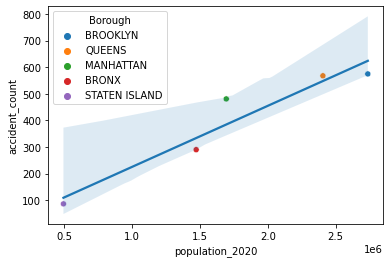

In [120]:
sns.scatterplot(y = 'accident_count', x = 'population_2020', hue = 'Borough', data = borough_data_merged)
sns.regplot(x = 'population_2020', y = 'accident_count', data = borough_data_merged, scatter = False)
plt.show()

## **What accident factors are most fatal?**

This question can be explored in 2 ways:

- At the average amount of deaths per accident for each factor
- Look at the percentage of fatal accidents (1 or more deaths) for each factor

Before any analyses, I will look at the distribution of deaths per accident

count    2000.000000
mean        0.001000
std         0.031615
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: number_of_persons_killed, dtype: float64


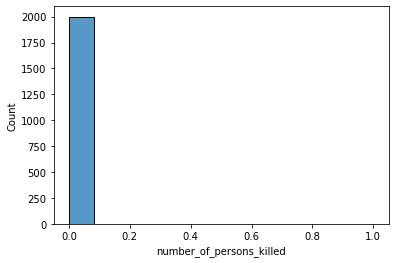

In [121]:
fatal_data = df.loc[df['number_of_persons_killed'].notnull()]
print(fatal_data['number_of_persons_killed'].describe())

sns.histplot(fatal_data, x = 'number_of_persons_killed')
plt.show()


In our sample, the max number of deaths per accident was 1. This means that the first approach of comparing average deaths between groups will not be a good way answering our questions.

A better approach would be to compare the number of accidents that were fatal 

In [122]:
fatal_data['fatal'] = np.where(df['number_of_persons_killed'] == 0, 'non-fatal', 'fatal')
# display(fatal_data['fatal'])
display(fatal_data.loc[fatal_data['number_of_persons_killed'] > 0][['number_of_persons_killed','fatal', 'contributing_factor_vehicle_1']])

,number_of_persons_killed,fatal,contributing_factor_vehicle_1
70,1,fatal,Traffic Control Disregarded
1886,1,fatal,Physical Disability


We see that we only have 2 accidents that were fatal, and both had different contributing factors. This makes it impossible to perform this analysis.

This also makes it impossible to perform analyses on fatality between car types.

## **Has accident frequency changed over time?**

Due to the small sample size, I will group accidents by month and year they occurred, and observe how the amount of accidents per mon

,count
month-year,
2012-07-01,15
2012-08-01,18
2012-09-01,15
2012-10-01,9
2012-11-01,14
...,...
2022-03-01,13
2022-04-01,12
2022-05-01,15


,timestamp,month_num,year_num,month-year
0,2013-12-05 08:15:00,12,2013,2013-12-01
1,2013-12-03 11:30:00,12,2013,2013-12-01
2,2021-12-11 16:00:00,12,2021,2021-12-01
3,2019-09-02 10:30:00,9,2019,2019-09-01
4,2012-08-03 07:10:00,8,2012,2012-08-01
...,...,...,...,...
1995,2021-04-07 17:31:00,4,2021,2021-04-01
1996,2015-12-24 12:16:00,12,2015,2015-12-01
1997,2014-10-09 08:52:00,10,2014,2014-10-01
1998,2013-12-12 13:30:00,12,2013,2013-12-01


Text(0, 0.5, 'Number of accidents from sample of 2000')

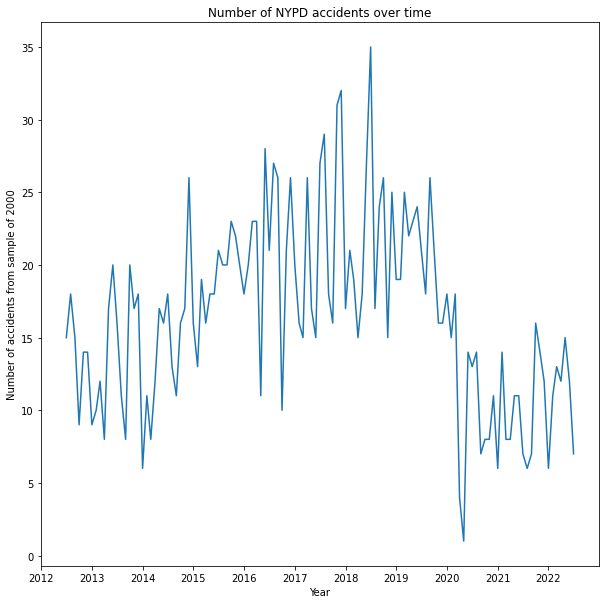

In [123]:
df['month_num'] = df['timestamp'].dt.month
df['year_num'] = df['timestamp'].dt.year
df['month-year'] = pd.to_datetime(df['year_num'].astype(str) + '/' + df['month_num'].astype(str) + '/01') # creating variable for each month/year

time_data = df.groupby('month-year')['month-year'].agg(count = 'count')
display(time_data)

display(df[['timestamp','month_num','year_num','month-year']])

plt.figure(figsize = (10,10))
sns.lineplot(x = time_data.index, y = 'count', data = time_data)
plt.title('Number of NYPD accidents over time')
plt.xlabel('Year')
plt.ylabel('Number of accidents from sample of 2000')

From this sample, it seems that the number of accidents increased until about 2018 where it peaked.

In 2019 and 2020, we saw a sharp decline in car accidents, likely due to lockdowns from the COVID-19 pandemic. The number of accidents per month has increased since the pandemic started as more people began going outside.

# **Summary**

To summarize our findings, we determined that:
- The most common contributing factor to car accidents in New York is distracted or inattentive driving
- Accidents do not seem to occur at equal rates throughout the year
- Brooklyn had the most accidents compared to other boroughs, but relative to population, Manhattan has the most accidents, likely due to increased population density.
- Since car accidents are so unlikely to be fatal, it is impossible to determine which contributing factors or car types produce the most fatal accidents. At least, using this small random sample.
- The number of car accidents was steadily increasing year over year until about 2017-2019. In 2020, there was a sharp decline in accidents, likely due to reduced driving caused by the COVID-19 pandemic lockdowns. Since then, car accidents have increased again.

### How to improve this analysis

This report was completed using a random sample of 2000 accidents from a New York Police Department database. Thus, it is difficult to get practical information on the frequency of different factors on accidents. Additionally, there are many issues with how some of the data was collected (for example, the variety of different values used for contributing vehicle types that mean the same thing) that makes it difficult to make useful inferences. 